<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы." data-toc-modified-id="Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.</a></span></li><li><span><a href="#Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной." data-toc-modified-id="Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.</a></span></li><li><span><a href="#Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишите-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишите-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишите функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы." data-toc-modified-id="Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.dummy import DummyRegressor

import numpy as np

In [2]:
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
datasets = [train_data,test_data,full_data]

for data in datasets:
    print('Duplicates:',data.duplicated().sum())
    data.info()

Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-

In [4]:
col_dif = full_data.columns.difference(test_data.columns)
col_dif

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

In [5]:
col_test = full_data.columns.difference(col_dif)
col_test

Index(['date', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_au', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [6]:
for column in full_data.columns:
    if column not in test_data.columns:
        print(column)
        test_data =test_data.merge(full_data[['date',column]],on='date')

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                5290 non-null   object 
 1   primary_cleaner.input.sulfate                       5286 non-null   float64
 2   primary_cleaner.input.depressant                    5285 non-null   float64
 3   primary_cleaner.input.feed_size                     5290 non-null   float64
 4   primary_cleaner.input.xanthate                      5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air              5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level            5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air              5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level            5290 non-null   float64
 9

По даннмы из исходного датасета восстановил тестовый датасет. Явных дубликатов в данных не найдено, есть пропуски, но их мало, пока решил оставить всё как есть)

In [8]:
train_data = train_data.fillna(method='ffill')
test_data = test_data.fillna(method='ffill')

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


Заполнили пропуски медиаными значениями (сделал это потому, что эффективность не считается из-за NAN значений).

In [10]:
def recovery(C,F,T):
    recovery = C*(F-T)/F/(C-T)*100
    mae = mean_absolute_error(recovery,train_data['rougher.output.recovery'])
    return mae

In [11]:
print('MAE:',recovery(train_data['rougher.output.concentrate_au'],train_data['rougher.input.feed_au']
         ,train_data['rougher.output.tail_au']))

MAE: 1.0748911125799084e-14


MAE почти равен нулю, значит эффектиновсть расчитана корректно.

По поводу признаков, которых не было изначально в тестовой выборке. Там отсутствовали признаки, которые описывали выходящий продукт после всех стадий обработки и их подсчёты.

In [12]:
col_dif

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

Общий вывод: были загружены 3 датасета, тестовый датасет был восстановлен из полных данных, также были заполнены пропуски медианными значениями. Подсчитана метрика MAE, она оказалось почти равной нулю.

## Анализ данных

###  Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [13]:
print('Концентрация до флотации')
print('Золото: {:0.2f},серебро: {:0.2f},свинцец: {:0.2f}'.format(train_data['rougher.input.feed_au'].mean(),
        train_data['rougher.input.feed_ag'].mean(),train_data['rougher.input.feed_pb'].mean()))
print('Концентрация после флотации')
print('Золото: {:0.2f},серебро: {:0.2f},свинцец: {:0.2f}'.format(train_data['rougher.output.concentrate_au'].mean(),
        train_data['rougher.output.concentrate_ag'].mean(),train_data['rougher.output.concentrate_ag'].mean()))
print('Концентрация после первичной очистки')
print('Золото: {:0.2f},серебро: {:0.2f},свинцец: {:0.2f}'.format(train_data['primary_cleaner.output.concentrate_au'].mean(),
        train_data['primary_cleaner.output.concentrate_ag'].mean(),train_data['primary_cleaner.output.concentrate_pb'].mean()))
print('Концентрация после вторичной очистки')
print('Золото: {:0.2f},серебро: {:0.2f},свинцец: {:0.2f}'.format(train_data['final.output.concentrate_au'].mean(),
        train_data['final.output.concentrate_ag'].mean(),train_data['final.output.concentrate_pb'].mean()))

Концентрация до флотации
Золото: 7.87,серебро: 8.58,свинцец: 3.51
Концентрация после флотации
Золото: 19.44,серебро: 11.78,свинцец: 11.78
Концентрация после первичной очистки
Золото: 32.39,серебро: 8.20,свинцец: 9.57
Концентрация после вторичной очистки
Золото: 44.00,серебро: 5.14,свинцец: 10.13


In [14]:
df_concentration = pd.DataFrame({'step':['r_i','r_o','p','s','r_i','r_o','p','s','r_i','r_o','p','s'],
                   'metal':['Au','Au','Au','Au','Ag','Ag','Ag','Ag','Pb','Pb','Pb','Pb'],
                  'concentration':[7.87,19.44,32.39,44.00,8.58,11.78,8.2,5.14,3.52,11.78,9.59,10.13]})
df_concentration

,step,metal,concentration
0,r_i,Au,7.87
1,r_o,Au,19.44
2,p,Au,32.39
3,s,Au,44.00
4,r_i,Ag,8.58
5,r_o,Ag,11.78
6,p,Ag,8.20
7,s,Ag,5.14
8,r_i,Pb,3.52
9,r_o,Pb,11.78


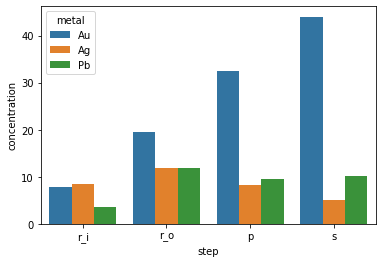

In [15]:
sns.barplot(data=df_concentration,x='step',y='concentration',hue='metal');

Концентрация золота увеличивается с каждым этапом очистки, концентрация серебра, пройдя все этапы, уменьшилась, а концентрация свинца увеличилась.

### Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


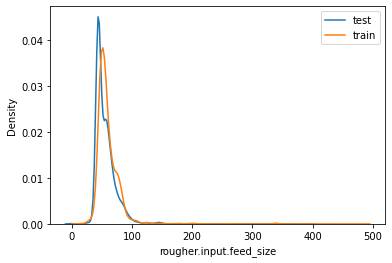

In [16]:
sns.distplot(test_data['rougher.input.feed_size'],hist=False);
sns.distplot(train_data['rougher.input.feed_size'],hist=False);
plt.legend(['test','train']);

Распределения имеют небольшие отличия. Центры распределений немного смещены относительно друг друга (размеры гранул в обучающей выборке в среднем больше, чем в тестовой), также у тестовой выборки значения менее разбросаны относительно центра (ширина распределения ниже, а высота больше, чем у обучающей выборки). 

### Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [17]:
def sum_conc(data):
    au = []
    ag = []
    pb = []
    sol = []
    summ = []   
    steps = ['rougher','final']
    for index in range(len(steps)):
        au.append(data[steps[index]+'.output.concentrate_au'])
        ag.append(data[steps[index]+'.output.concentrate_ag'])
        pb.append(data[steps[index]+'.output.concentrate_pb'])
        sol.append(data[steps[index]+'.output.concentrate_sol'])
        summ.append(au[index]+ag[index]+pb[index]+sol[index])
        summ[index].hist(bins=70,figsize=(25,10),alpha=0.6)
    summ.append(data['rougher.input.feed_au']+data['rougher.input.feed_ag']+data['rougher.input.feed_pb']+
                data['rougher.input.feed_sol'])
    summ[-1].hist(bins=70,figsize=(25,20),alpha=0.6)
    plt.legend(['rougher_out','final','rougher_in'],prop={'size': 15})    
    
    

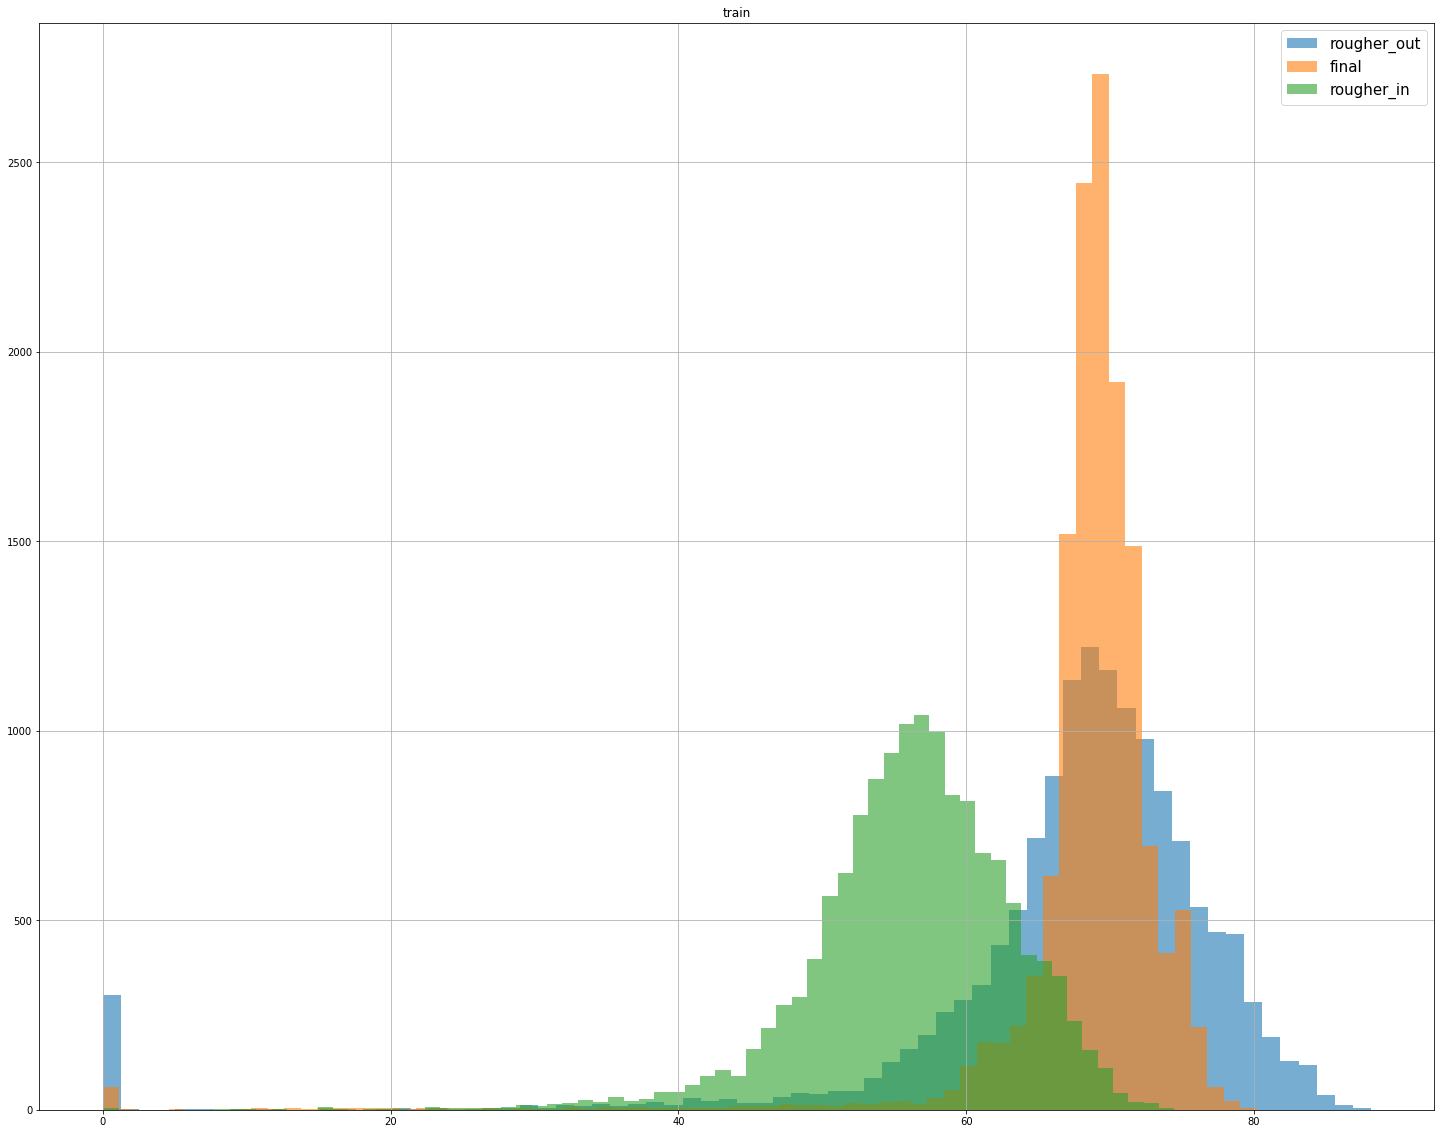

In [18]:
sum_conc(train_data)
plt.title('train');

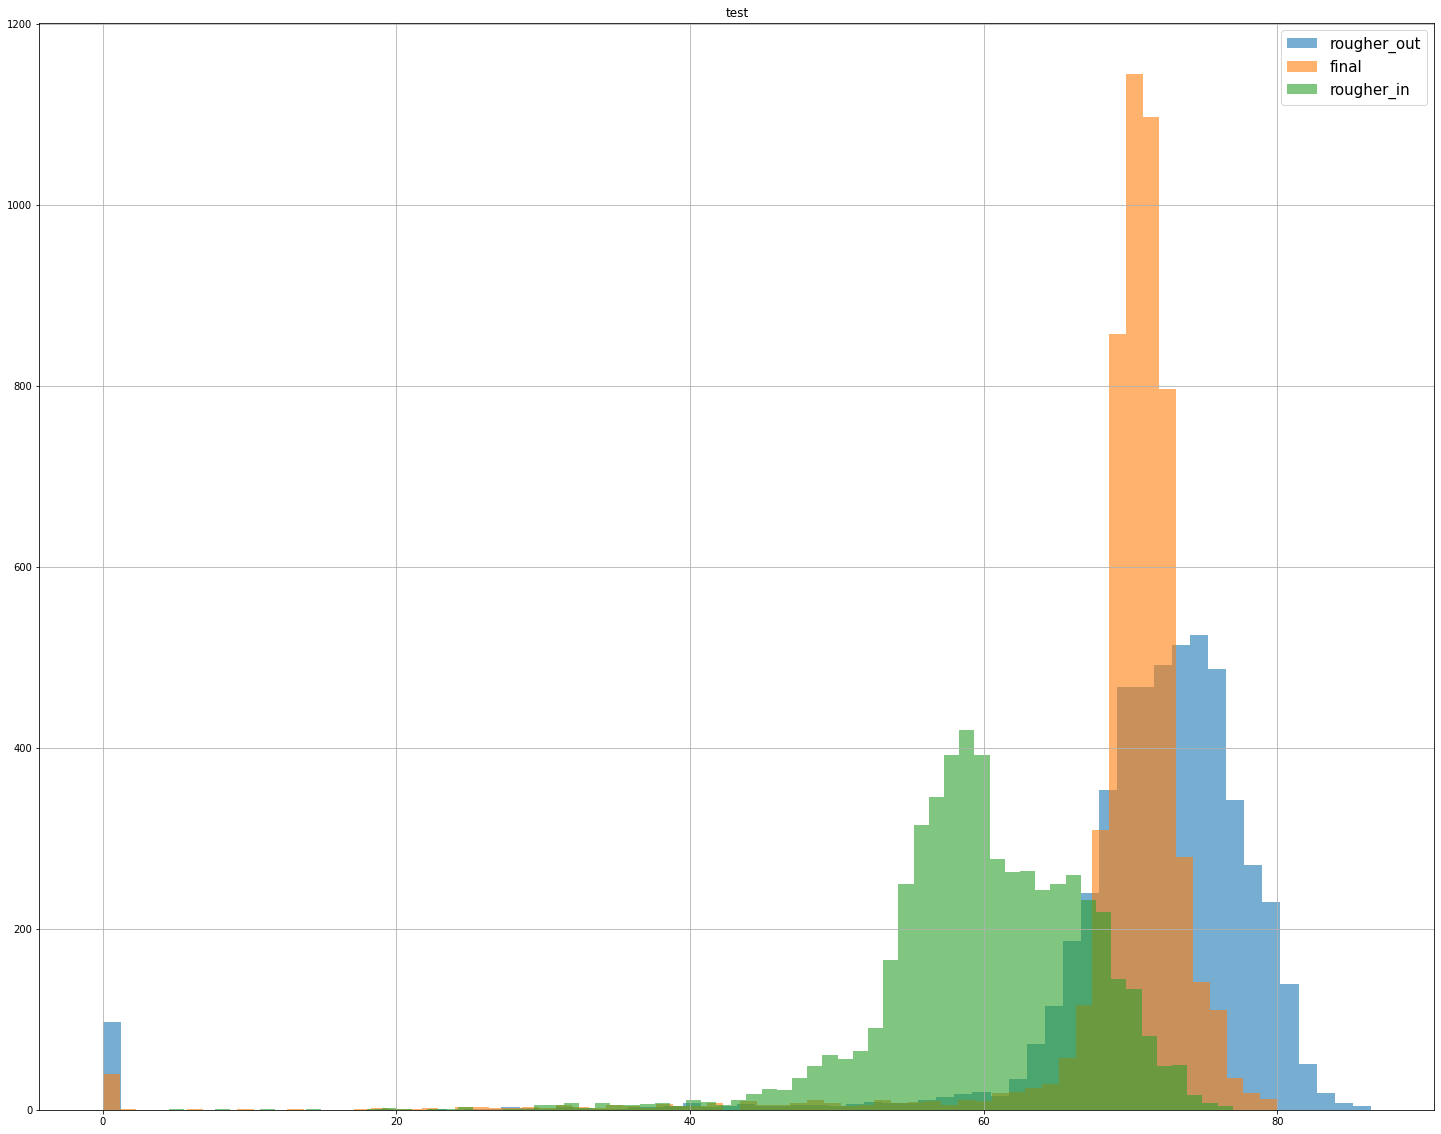

In [19]:
sum_conc(test_data)
plt.title('test');

Распределение суммарных концентраций после всех этапов становится меньше по ширине и выше по высоте, однако средняя концетрация после первого этапа и последнего очень близки друг к другу (можно предположить, что это связано с тем, что концентрация золота увеличивается, а концетрации остальных металлов уменьшается, таким образом суммарная средняя концентрация остаётся прежней).

На графиках есть выбросы около нуля. Уберём их

In [20]:
print(train_data[train_data['rougher.input.feed_au'] == 0].count().max())
print(train_data[train_data['rougher.input.feed_ag'] == 0].count().max())
print(train_data[train_data['rougher.input.feed_pb'] == 0].count().max())
print(train_data[train_data['rougher.input.feed_sol'] == 0].count().max())

0
0
0
0


In [21]:
train_data =  train_data[train_data['rougher.output.concentrate_au'] != 0]
train_data =  train_data[train_data['rougher.output.concentrate_sol'] != 0]

In [22]:
print(train_data[train_data['rougher.output.concentrate_au'] == 0].count().max()) 
print(train_data[train_data['rougher.output.concentrate_ag'] == 0].count().max())
print(train_data[train_data['rougher.output.concentrate_pb'] == 0].count().max())
print(train_data[train_data['rougher.output.concentrate_sol'] == 0].count().max())

0
0
0
0


In [23]:
train_data =  train_data[train_data['final.output.concentrate_au'] != 0]

In [24]:
print(train_data[train_data['rougher.output.concentrate_au'] == 0].count().max()) 
print(train_data[train_data['rougher.output.concentrate_ag'] == 0].count().max())
print(train_data[train_data['rougher.output.concentrate_pb'] == 0].count().max())
print(train_data[train_data['rougher.output.concentrate_sol'] == 0].count().max())

0
0
0
0


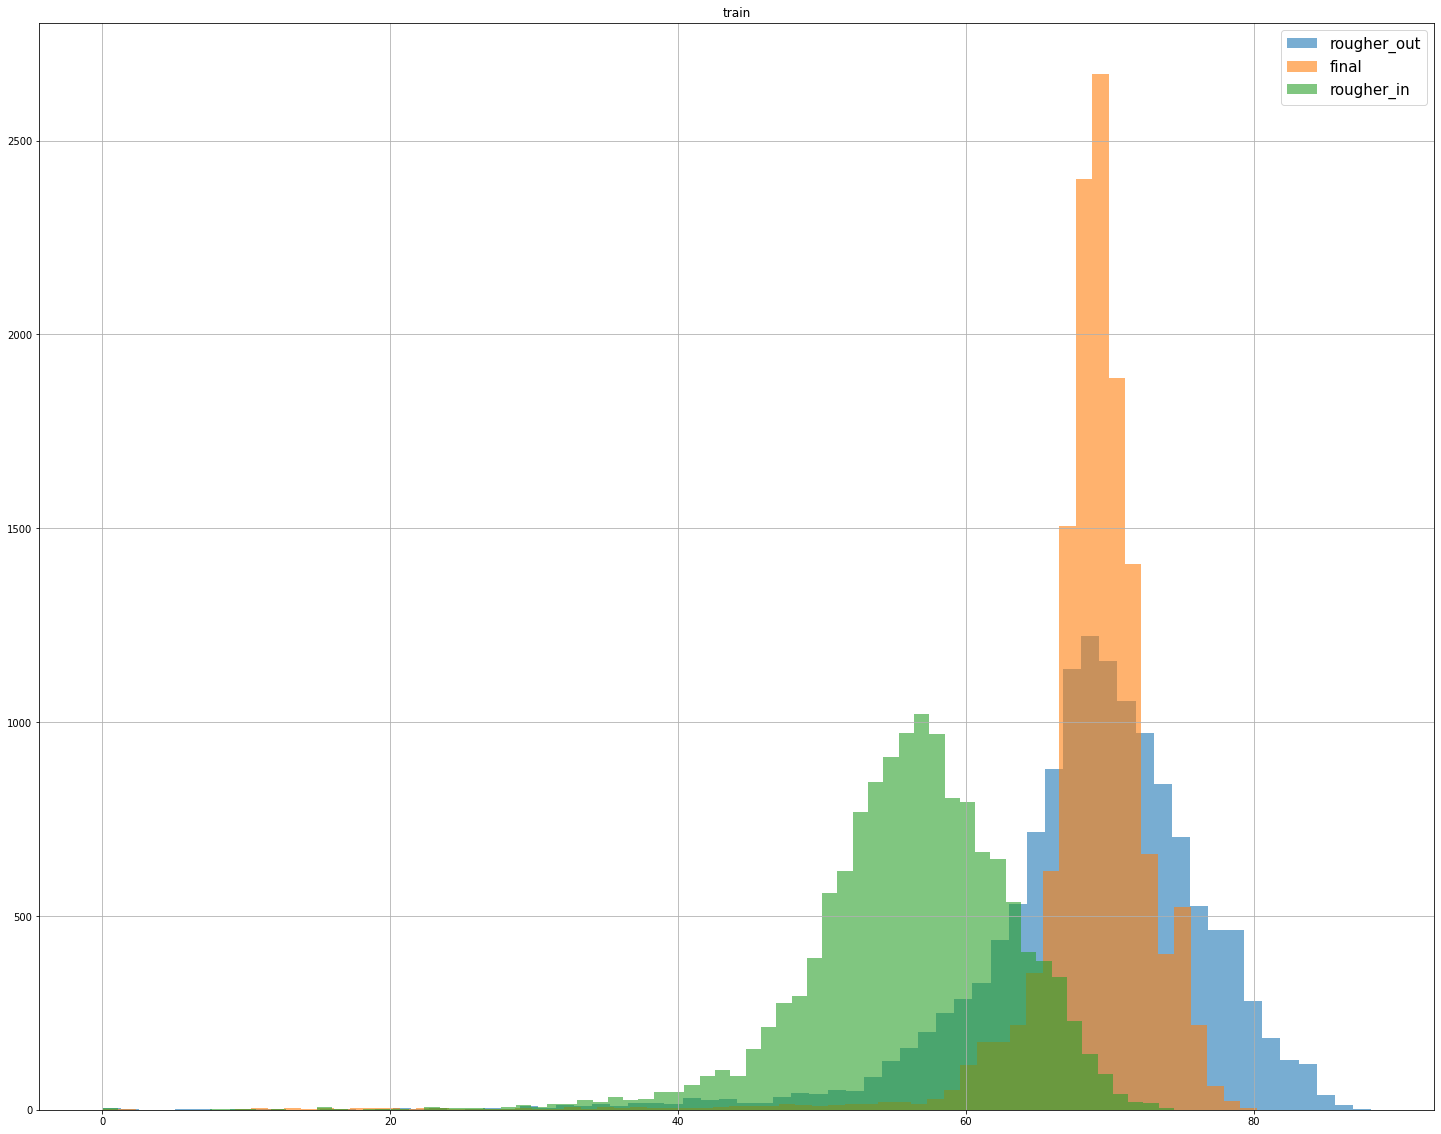

In [25]:
sum_conc(train_data)
plt.title('train');

Убрал все выбросы(можно их убрать, потому что их мало по сравнению со всей выборкой) 

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13792 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                13792 non-null  object 
 1   final.output.concentrate_ag                         13792 non-null  float64
 2   final.output.concentrate_pb                         13792 non-null  float64
 3   final.output.concentrate_sol                        13792 non-null  float64
 4   final.output.concentrate_au                         13792 non-null  float64
 5   final.output.recovery                               13792 non-null  float64
 6   final.output.tail_ag                                13792 non-null  float64
 7   final.output.tail_pb                                13792 non-null  float64
 8   final.output.tail_sol                               13792 non-null  float64


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                5290 non-null   object 
 1   primary_cleaner.input.sulfate                       5290 non-null   float64
 2   primary_cleaner.input.depressant                    5290 non-null   float64
 3   primary_cleaner.input.feed_size                     5290 non-null   float64
 4   primary_cleaner.input.xanthate                      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air              5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level            5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air              5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level            5290 non-null   float64
 9

## Модель

###  Напишите функцию для вычисления итоговой sMAPE.

In [28]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error


def total_sMAPE(rougher_smape, final_smape):
    return 0.25 * rougher_smape + 0.75 * final_smape


sMAPE_score = make_scorer(sMAPE,greater_is_better=False)

### Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

Масшитабирование

In [29]:
scaler = StandardScaler()
features_columns = col_test[(col_test != 'date')]

In [30]:
len(features_columns)

52

In [31]:
features_train = train_data[features_columns]
target_train_f_recovery = train_data['final.output.recovery']
target_train_r_recovery = train_data['rougher.output.recovery']

features_test = test_data[features_columns]
target_test_f_recovery = test_data['final.output.recovery']
target_test_r_recovery = test_data['rougher.output.recovery']

In [32]:
scaler.fit(features_train)
features_train[features_columns] = scaler.transform(features_train[features_columns])
features_test[features_columns] = scaler.transform(features_test[features_columns])

/tmp/ipykernel_63/761387425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[features_columns] = scaler.transform(features_train[features_columns])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Модели

LinearRegression()

In [128]:
sMAPE_rougher = np.mean(cross_val_score(LinearRegression(), features_train, 
                                        target_train_r_recovery, scoring=sMAPE_score, 
                                        cv=5))
sMAPE_final= np.mean(cross_val_score(LinearRegression(), features_train, 
                                      target_train_f_recovery, scoring=sMAPE_score, 
                                      cv=5))
print(sMAPE_rougher, sMAPE_final)
print('Итоговой sMAPE:',total_sMAPE(sMAPE_rougher, sMAPE_final))

-7.272530148921712 -10.98817187500314
Итоговой sMAPE: -10.059261443482782


DecisionTreeRegressor()

In [129]:
sMAPE_rougher = np.mean(cross_val_score(DecisionTreeRegressor(max_depth=3, random_state=12345), 
                                        features_train, target_train_r_recovery, scoring=sMAPE_score, 
                                        cv=5))
sMAPE_final = np.mean(cross_val_score(DecisionTreeRegressor(max_depth=3, random_state=12345), 
                                      features_train, target_train_f_recovery, scoring=sMAPE_score,
                                      cv=5))
print(sMAPE_rougher, sMAPE_final)
print('Итоговый sMAPE:', total_sMAPE(sMAPE_rougher, sMAPE_final))

-7.355656304525764 -9.449161834532678
Итоговый sMAPE: -8.925785452030949


RandomForestRegressor()

In [130]:
param_grid = { 
    'n_estimators': [1,5,7,11,15],
    'max_depth' : [4,5,6,7,8]
}

In [131]:
model = RandomForestRegressor(random_state = 12345)

In [132]:
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5,scoring=sMAPE_score)
CV_rfc.fit(features_train, target_train_f_recovery)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [1, 5, 7, 11, 15]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [133]:
CV_rfc.best_params_

{'max_depth': 4, 'n_estimators': 11}

In [134]:
CV_rfc.best_score_

-9.124811273185639

In [135]:
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5,scoring=sMAPE_score)
CV_rfc.fit(features_train, target_train_r_recovery)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [1, 5, 7, 11, 15]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [136]:
CV_rfc.best_params_

{'max_depth': 5, 'n_estimators': 11}

In [137]:
CV_rfc.best_score_

-6.643640342956003

In [144]:
sMAPE_rougher = np.mean(cross_val_score(RandomForestRegressor(max_depth=5, n_estimators=11, random_state=12345), 
                                        features_train, target_train_r_recovery, scoring=sMAPE_score, cv=5))
sMAPE_final = np.mean(cross_val_score(RandomForestRegressor(max_depth=4, n_estimators=11, random_state=12345), 
                                      features_train, target_train_f_recovery, scoring=sMAPE_score, cv=5))
print(sMAPE_rougher, sMAPE_final)
print('Итоговый sMAPE:', total_sMAPE(sMAPE_rougher, sMAPE_final))

-6.643640342956003 -9.124811273185639
Итоговый sMAPE: -8.50451854062823


Проверка на тестовой выборке

In [33]:
model = RandomForestRegressor(max_depth=5, n_estimators=11, random_state=12345)
model.fit(features_train, target_train_r_recovery)
predicted = model.predict(features_test)
sMAPE_rought = sMAPE(target_test_r_recovery, predicted)

model = RandomForestRegressor(max_depth=4, n_estimators=11, random_state=12345)
model.fit(features_train, target_train_f_recovery)
predicted = model.predict(features_test)
sMAPE_final = sMAPE(target_test_f_recovery, predicted)

print('Итоговое sMAPE:', total_sMAPE(sMAPE_rought, sMAPE_final))

Итоговое sMAPE: 9.62582072568787


In [34]:
base_r = DummyRegressor()
base_f = DummyRegressor()

In [35]:
base_r.fit(features_train,target_train_r_recovery)
base_f.fit(features_train,target_train_f_recovery)

DummyRegressor()

In [36]:
base_r_pred = base_r.predict(features_test)
base_f_pred = base_f.predict(features_test)

In [37]:
sMAPE_rought = sMAPE(target_test_r_recovery, base_r_pred)
sMAPE_final = sMAPE(target_test_f_recovery, base_f_pred)
print('Итоговое sMAPE:', total_sMAPE(sMAPE_rought, sMAPE_final))

Итоговое sMAPE: 9.821468391820268


Вывод: были рассмотрены три модели, минимальное значение sMape на тестовой выборке показала модель RandomForestRegressor.

Общий вывод: 

1. Было загружен 3 датасета, проверена корректность расчёта эффективности обогащения и проанализированы признаки, недоступные в тестовой выборке. 
2. Проанализированны данные, рассмотрено как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки, было проведено сравнение распределений размеров гранул сырья на обучающей и тестовой выборках, исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 
3. Построены 3 модели, лучшие результаты показала модель случайного леса, написаны функции для вычисления итоговой sMAPE, обучены разные модели и оценены их качество кросс-валидацией. Провелось сравнение с константной моделью.